<a href="https://colab.research.google.com/github/msboralugoda/CV_Intensity-Transformations-and-Filtering/blob/main/spatial_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv

f = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 180, 90, 90, 180, 90, 0],
              [0, 0, 180, 90, 180, 180, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])
k = 1/9*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
g = cv.filter2D(f.astype(np.float32), -1, k.astype(np.float32))
print(g)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 20. 30. 40. 40. 40. 30. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 20. 30. 50. 50. 40. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


Convolves f with k.

astype(np.float32): use floats to keep fractional results (no rounding/clipping like with uint8).

-1 for ddepth: output has the same depth as the input (float32).

Anchor defaults to the kernel center (1,1).

Border handling is OpenCV’s default (BORDER_REFLECT_101) so edges reflect outward.

## Average Fitlering Using Loops
Do not use this as this is inefficient and does not work for any kernel in gerneral due not doing a propper convertion to uint8.

True

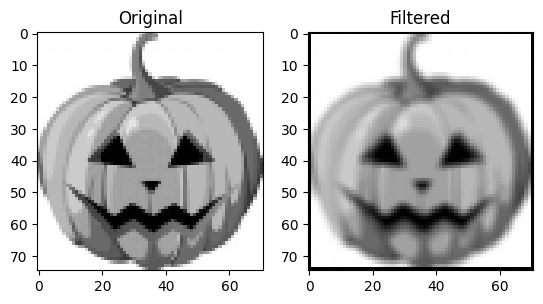

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1 # to make sure kernel is odd-sized, so that we can find the center pixel
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2) # half height and half width of the kernel
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX) # normalize image to range [0, 1]
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())   # dot product of the kernel and the image patch
    return result

img = cv.imread(r"C:\Users\amasha\Desktop\Photoshop ideas\pumpkin.jpeg", cv.IMREAD_REDUCED_GRAYSCALE_8)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)

# Averaging Using Filt2D

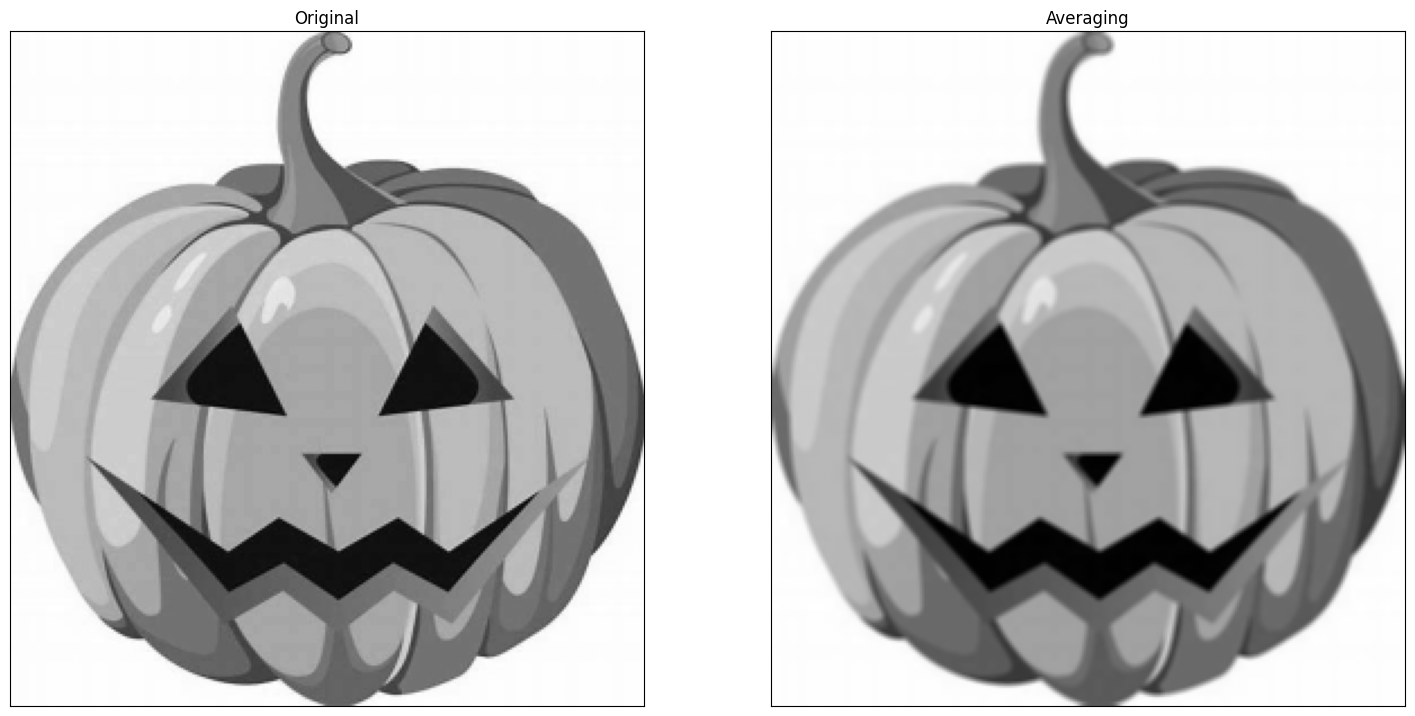

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread(r"C:\Users\amasha\Desktop\Photoshop ideas\pumpkin.jpeg", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

kernel = np.ones((3,3),np.float32)/9
imavg = cv.filter2D(im, cv.CV_32F, kernel)

# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## Sobel Filtering

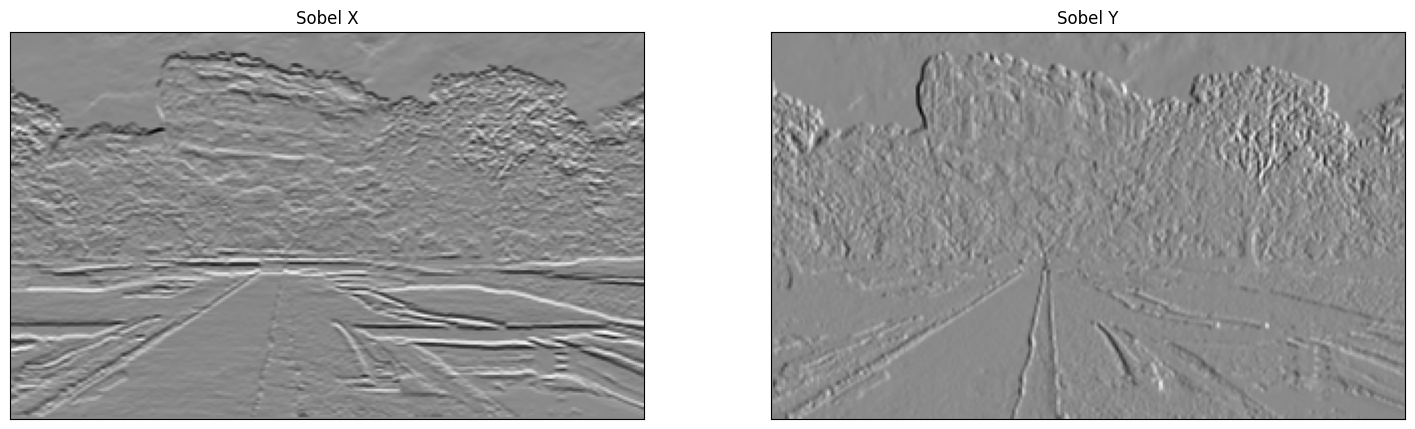

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


# Smoothing with a Box Filter

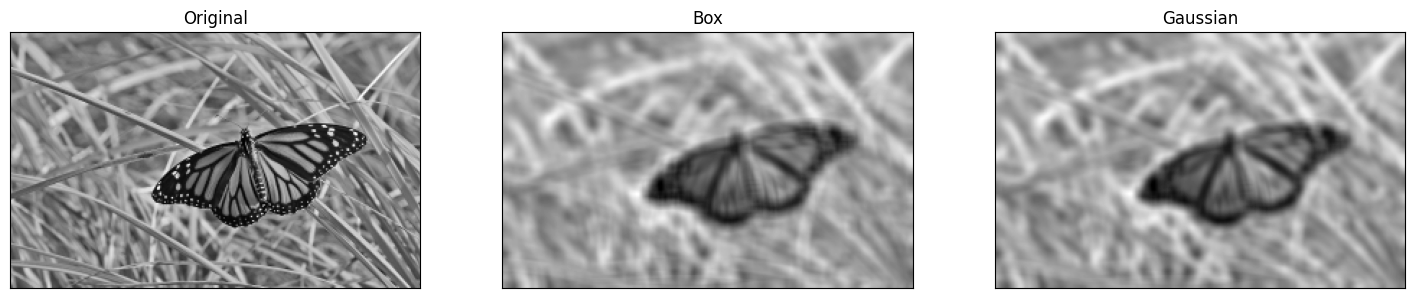

In [ ]:
#  Box filer
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

img = cv.imread('images/butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4) # downsampled image

# Box filter
box = 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box)


# Box filter
gaus = cv.getGaussianKernel(9, 4) # 1D Gaussian kernel of size 9 with a sigma value of 4
imgg = cv.sepFilter2D(img, -1, gaus, gaus) # 2D Gaussian filter by separating it into two 1D filters (This methiod is more efficient)


# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_original.jpg', img)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_box.jpg', imgb)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/box_vs_gaussian_gaussian.jpg', imgg)


fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Creating a Gaussian Kernel

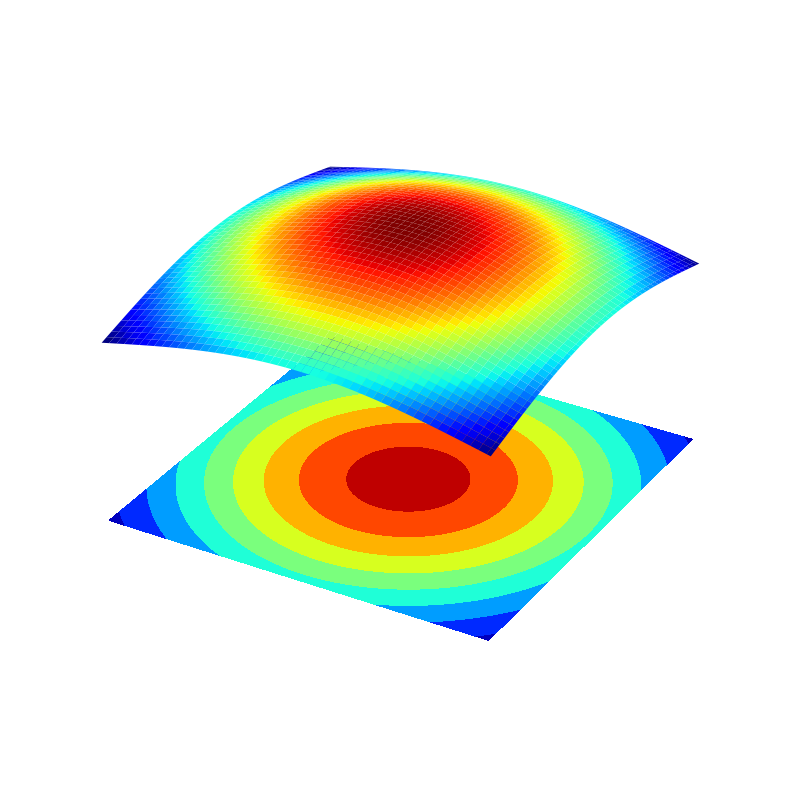

In [ ]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 5


X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

# plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/gaussian_2d_5.jpg')

plt.show()

# Gaussian Noise Filtering

uint8
255


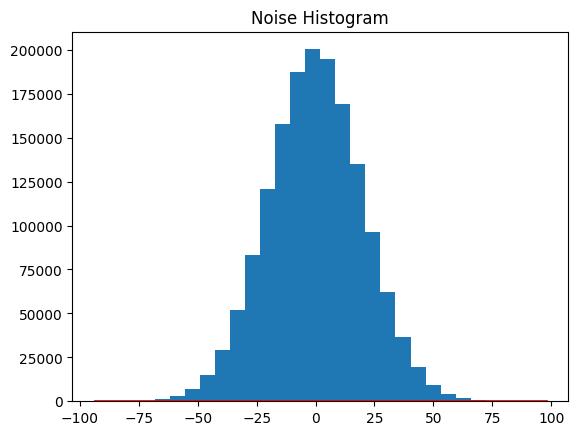

In [ ]:
# Gaussian Noise Filtering
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('images/gal.jpg', cv.IMREAD_COLOR)
print(img.dtype)
print(img.max())
mu = 0.0
sigma = 20
gauss = np.array(img.shape).astype('uint8')
h, w, c = img.shape
gauss = np.random.normal(mu,sigma, (h, w, c))
#gauss = gauss.reshape(h, w, c)
noisy = cv.add(img, gauss, dtype=cv.CV_8UC3)

count, bins, ignored = plt.hist(gauss.flatten(), 30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Noise Histogram')
plt.show()

sigma = 5
kernel = cv.getGaussianKernel(11, sigma)
filtered = cv.sepFilter2D(noisy, -1, kernel, kernel)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", noisy)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow("Image", filtered.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

# Effect of $\sigma$

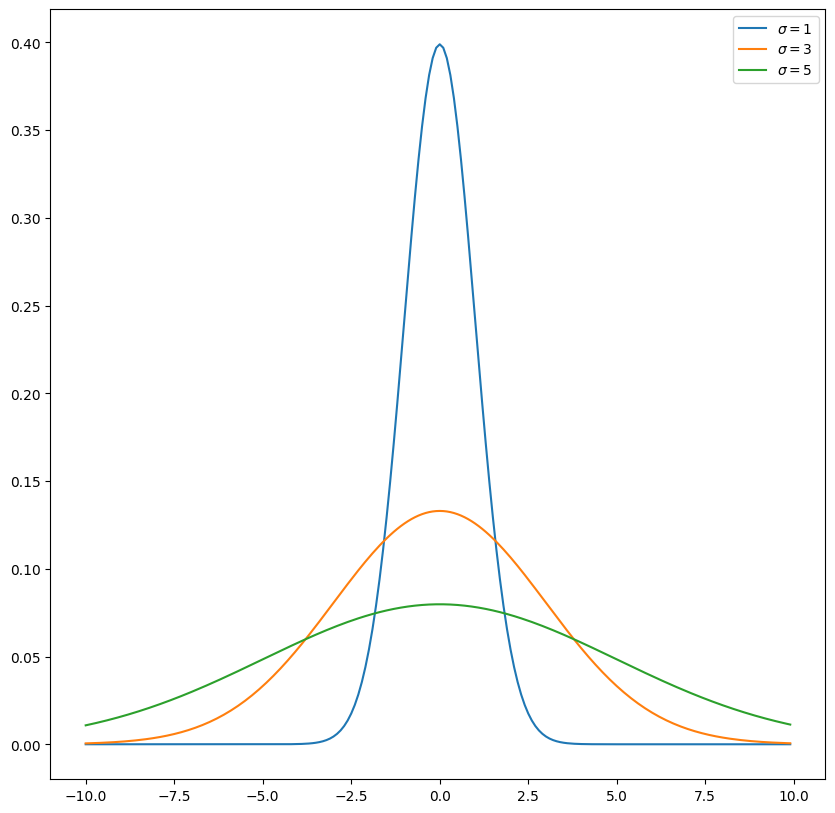

In [ ]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import tikzplotlib

def g(x, mu, sigma):
    return 1./(sigma*np.sqrt(2.*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


x = np.arange(-10., 10., 0.1)
fig, ax  = plt.subplots(1,1, sharex='all', sharey='all', figsize=(10,10))
ax.plot(x, g(x, 0, 1), label='$\sigma=1$')
ax.plot(x, g(x, 0, 3), label='$\sigma=3$')
ax.plot(x, g(x, 0, 5), label='$\sigma=5$')
ax.legend()
# tikzplotlib.save("../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/effect_of_sigma.tex")
plt.show()

# Noise

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from scipy import stats

def noisy(noise_typ, image):
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Should be float32 and range [0, 255].
    noise_typ : str
        'gauss', 'poisson', 's&p', or 'speckle'
    """
    if image.ndim == 2:
        row, col = image.shape
        ch = 1
    else:
        row, col, ch = image.shape

    if noise_typ == "gauss":
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean, sigma, (row, col) if ch == 1 else (row, col, ch))
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy

    elif noise_typ == "s&p":
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)

        # Salt mode
        num_salt = np.ceil(amount * row * col * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt)) for i in (row, col)]
        if ch == 1:
            out[coords[0], coords[1]] = 255
        else:
            out[coords[0], coords[1], :] = 255

        # Pepper mode
        num_pepper = np.ceil(amount * row * col * (1. - s_vs_p))
        coords = [np.random.randint(0, i, int(num_pepper)) for i in (row, col)]
        if ch == 1:
            out[coords[0], coords[1]] = 0
        else:
            out[coords[0], coords[1], :] = 0

        return out

    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return np.clip(noisy, 0.0, 255.0)

    elif noise_typ == "speckle":
        gauss = np.random.randn(row, col) if ch == 1 else np.random.randn(row, col, ch)
        noisy = image + image * gauss
        return np.clip(noisy, 0.0, 255.0)

    else:
        raise ValueError(f"Unknown noise type: {noise_typ}")


# Effect of Gaussian Noise Level and Smoothing Level

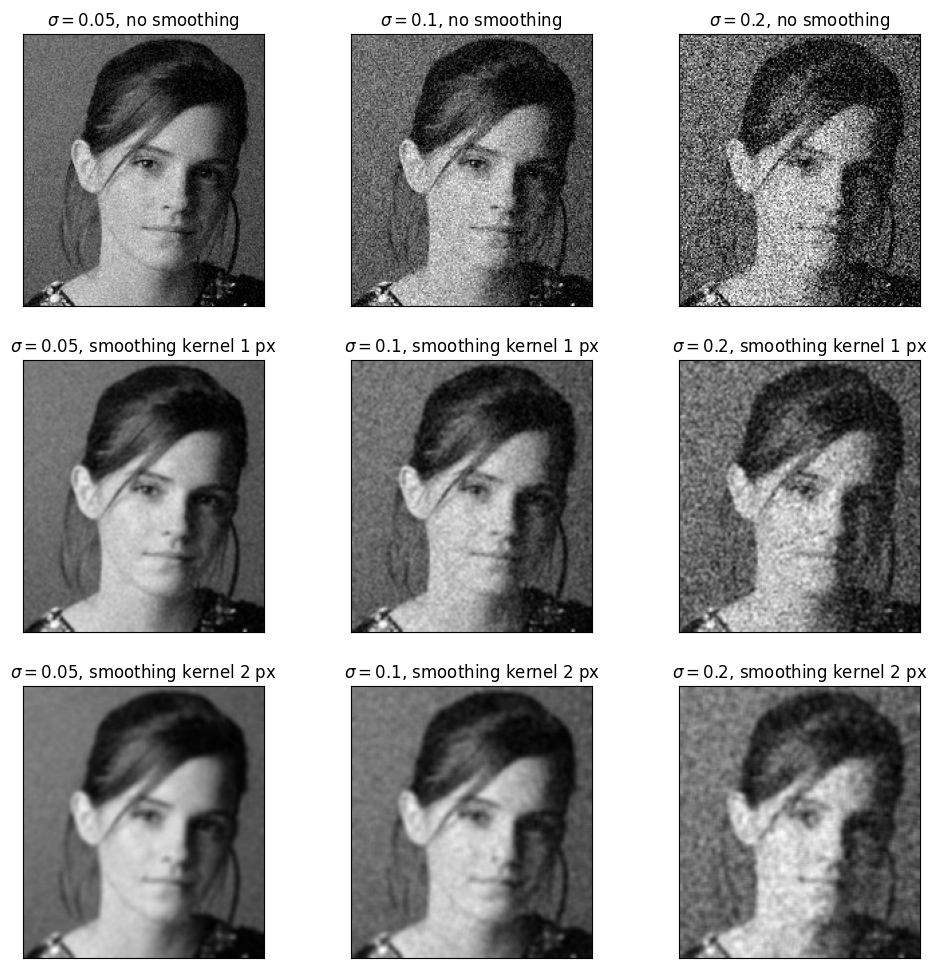

In [ ]:
# Effect of Gaussian Kernel Size
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)


mean = 0.
noise = [0.05, 0.1, 0.2]
sigma = [0, 1, 2]
sigma_text = ['no smoothing', 'smoothing kernel 1 px', 'smoothing kernel 2 px']
fig, axes  = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    for j in range(3):
        gauss = np.random.normal(mean,noise[i]*255., img.shape)
        gauss = gauss.reshape(img.shape)
        imn = img + gauss
        imn = np.clip(imn, 0.0, 255.0)
        ksize = sigma[j]*2+1
        if j != 0:
            imn = cv.GaussianBlur(imn, (ksize, ksize), sigmaX=sigma[j], sigmaY=sigma[j])

        axes[j,i].imshow(imn, cmap='gray')
        axes[j,i].set_title(r'$\sigma={0}$, {1}'.format(noise[i], sigma_text[j]))
        axes[j,i].set_xticks([]), axes[j,i].set_yticks([])

# plt.savefig("../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/noise_level_and_smoothing.jpg", dpi=150, bbox_inches='tight')
plt.show()

# Failure of Gaussian Smoothing to Handle Salt and Pepper Noise

[1.5 2.5 3.5]


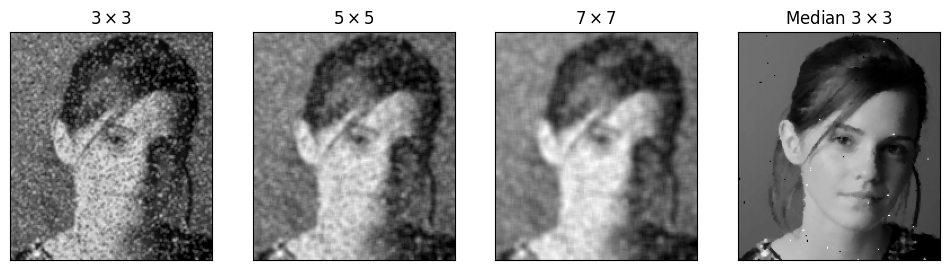

In [ ]:
# Failure of Gaussian Smoothing to Handle Salt and Pepper Noise
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
imn =  noisy('s&p', img.astype('float32'))

ksize = np.array([3, 5, 7])
sigma = ksize/2.
print(sigma)
fig, axes  = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))


for i in range(3):
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])
    axes[i].imshow(imf, cmap='gray')
    axes[i].set_title(r'${0}\times {0}$'.format(ksize[i]))
    axes[i].set_xticks([]), axes[i].set_yticks([])

imf = cv.medianBlur(imn, 3)
axes[3].imshow(imf, cmap='gray')
axes[3].set_title(r'Median ${0}\times {0}$'.format(3))
axes[3].set_xticks([]), axes[i].set_yticks([])
plt.show()

# Median Filtering

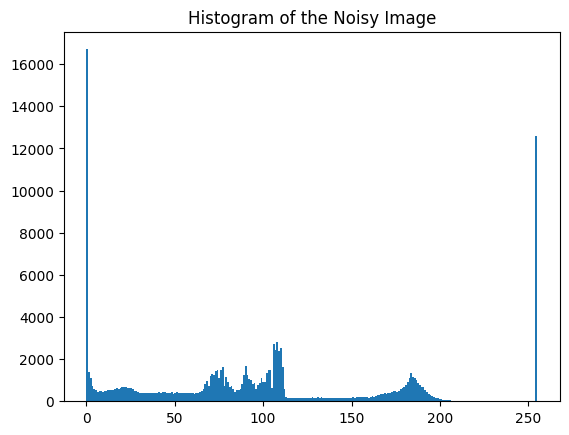

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn =  noisy('s&p', img.astype('float32'))
imf = cv.medianBlur(imn, 5)

plt.hist(imn.ravel(), bins=256)
plt.title('Histogram of the Noisy Image')


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", imf.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

# Sharpening

DescribeResult(nobs=84135, minmax=(0, 73), mean=1.297462411600404, variance=13.521458723285198, skewness=6.147052889398213, kurtosis=55.430272139483776)


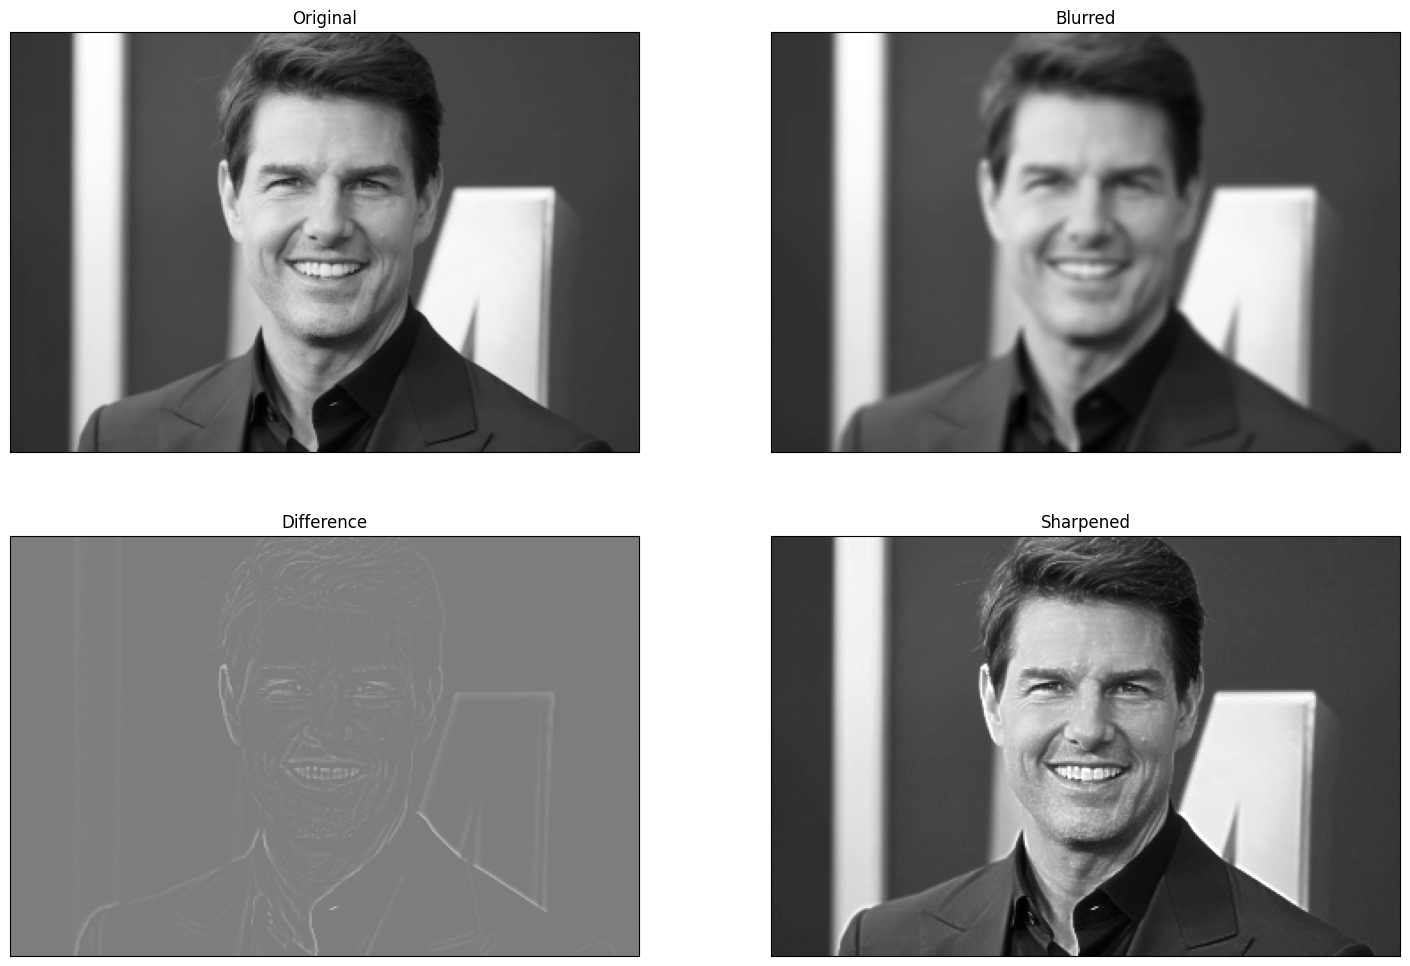

In [ ]:
# Sharpening
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff =  cv.subtract(img, blurred)

sharpened = cv.addWeighted(img, 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))


# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_original.jpg', img)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_blurred.jpg', blurred)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_diff.jpg', diff + 125)
# cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sharpening_sharpened.jpg', sharpened)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,12))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
# plt.savefig('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/tom_unsharp.jpg')
plt.show()

# Unsharp Mask Filter

(41, 41)


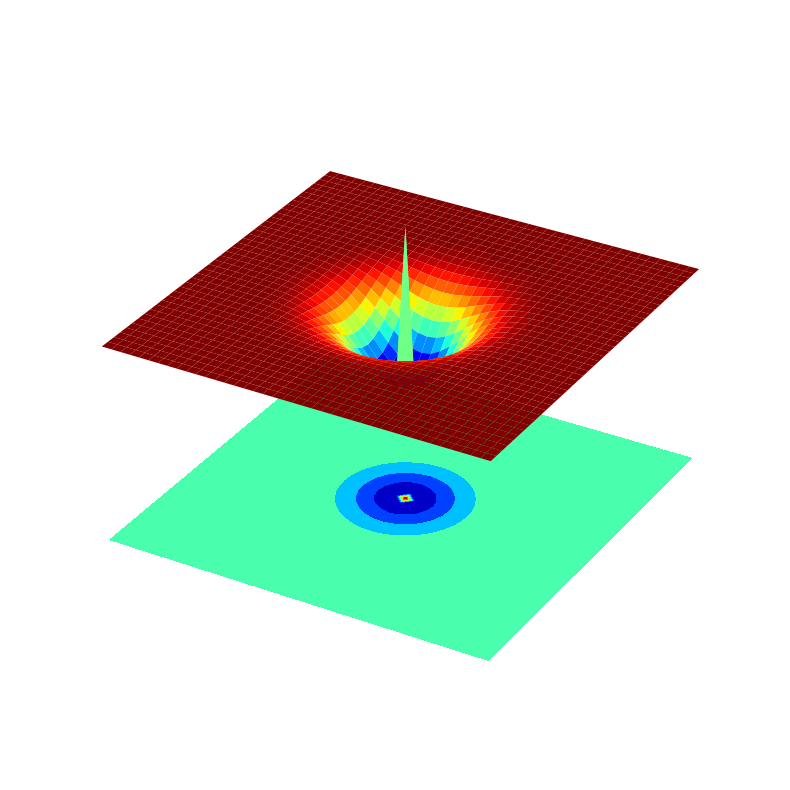

In [ ]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
imp = np.zeros(Z.shape)
print(Z.shape)
imp[int(Z.shape[0]/2), int(Z.shape[1]/2)] = 2
Z = imp - Z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_aspect('equal')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


plt.show()

# Sharpenign Using Unsharp Marsking Filer

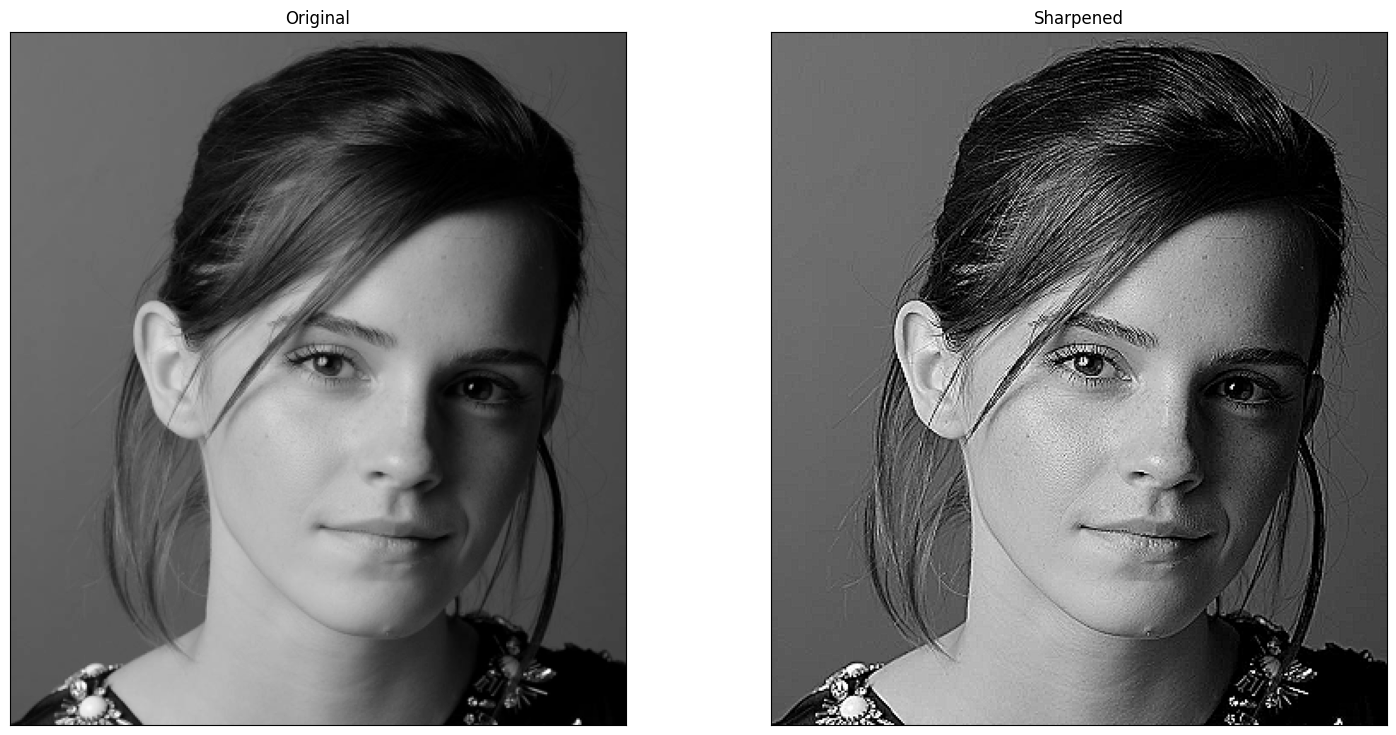

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/emma.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)

#cv.imwrite('../../EN2550Lectures/en2550_lec03_spatial_filtering/figures/sigiriya_sobel_horizontal.jpg', imgc)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Hybrid Images
https://jeremykun.com/2014/09/29/hybrid-images/ https://github.com/j2kun/hybrid-images

In [ ]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
from scipy import misc
import math
import cv2 as cv

def scaleSpectrum(A):
   return numpy.real(numpy.log10(numpy.absolute(A) + numpy.ones(A.shape)))


# sample values from a spherical gaussian function from the center of the image
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if highPass else coefficient

   return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])


def filterDFT(imageMatrix, filterMatrix):
   shiftedDFT = fftshift(fft2(imageMatrix))
#    misc.imsave("dft.png", scaleSpectrum(shiftedDFT))

   filteredDFT = shiftedDFT * filterMatrix
#    misc.imsave("filtered-dft.png", scaleSpectrum(filteredDFT))
   return ifft2(ifftshift(filteredDFT))


def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))


def highPass(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))


def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)
    cv.namedWindow('HP', cv.WINDOW_AUTOSIZE)
    cv.imshow('HP', highPassed.astype(np.uint8))
    cv.waitKey()
    return highPassed + lowPassed


def playWithFiltering():
    marilyn = cv.imread("images/marilyn.png", cv.IMREAD_GRAYSCALE)
    highPassedMarilyn = highPass(marilyn, 20)
    lowPassedMarilyn = lowPass(marilyn, 20)

#    misc.imsave("low-passed-marilyn.png", numpy.real(lowPassedMarilyn))
#    misc.imsave("high-passed-marilyn.png", numpy.real(highPassedMarilyn))
#    misc.imsave("sum-of-marilyns.png", numpy.real((highPassedMarilyn + lowPassedMarilyn)/2.0))
    cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
    cv.imshow('Image', highPassedMarilyn)
    cv.waitKey()
    cv.destroyAllWindows()

# if __name__ == "__main__":
einstein = cv.imread("images/einstein.png", cv.IMREAD_GRAYSCALE)
marilyn = cv.imread("images/marilyn.png", cv.IMREAD_GRAYSCALE)

hybrid = hybridImage(einstein, marilyn, 25, 10)
#    misc.imsave("marilyn-einstein.png", numpy.real(hybrid))

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', hybrid.astype(np.uint8))
cv.waitKey()
cv.destroyAllWindows()

C:\Users\RangaRodrigo\AppData\Local\Temp\ipykernel_17324\368059056.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('HP', highPassed.astype(np.uint8))
C:\Users\RangaRodrigo\AppData\Local\Temp\ipykernel_17324\368059056.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('Image', hybrid.astype(np.uint8))


# Bilateral Filtering

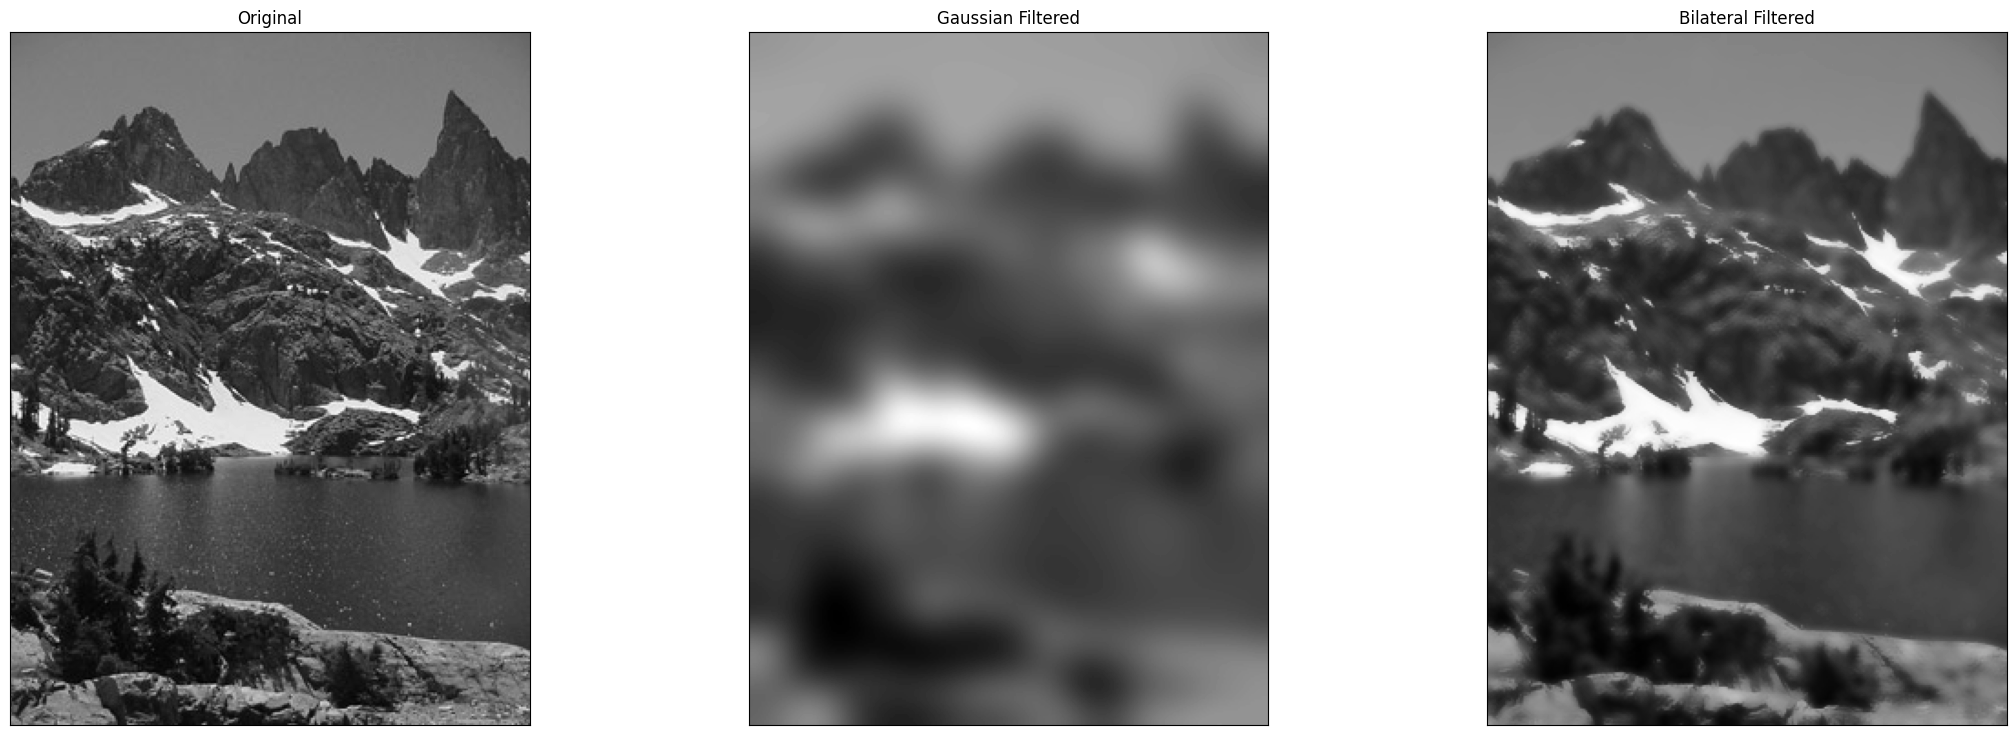

In [ ]:
# Bilateral Filtering
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('images/minaret.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

sigma_s = 75
sigma_r = 75
im_gaussian = cv.GaussianBlur(im, (sigma_s, sigma_s), 0)
im_bilateral = cv.bilateralFilter(im, 9, sigma_r, sigma_s)

fig, ax = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(27, 9))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_gaussian, cmap='gray')
ax[1].set_title('Gaussian Filtered')
ax[1].set_xticks([]), ax[2].set_yticks([])
ax[2].imshow(im_bilateral, cmap='gray')
ax[2].set_title('Bilateral Filtered')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

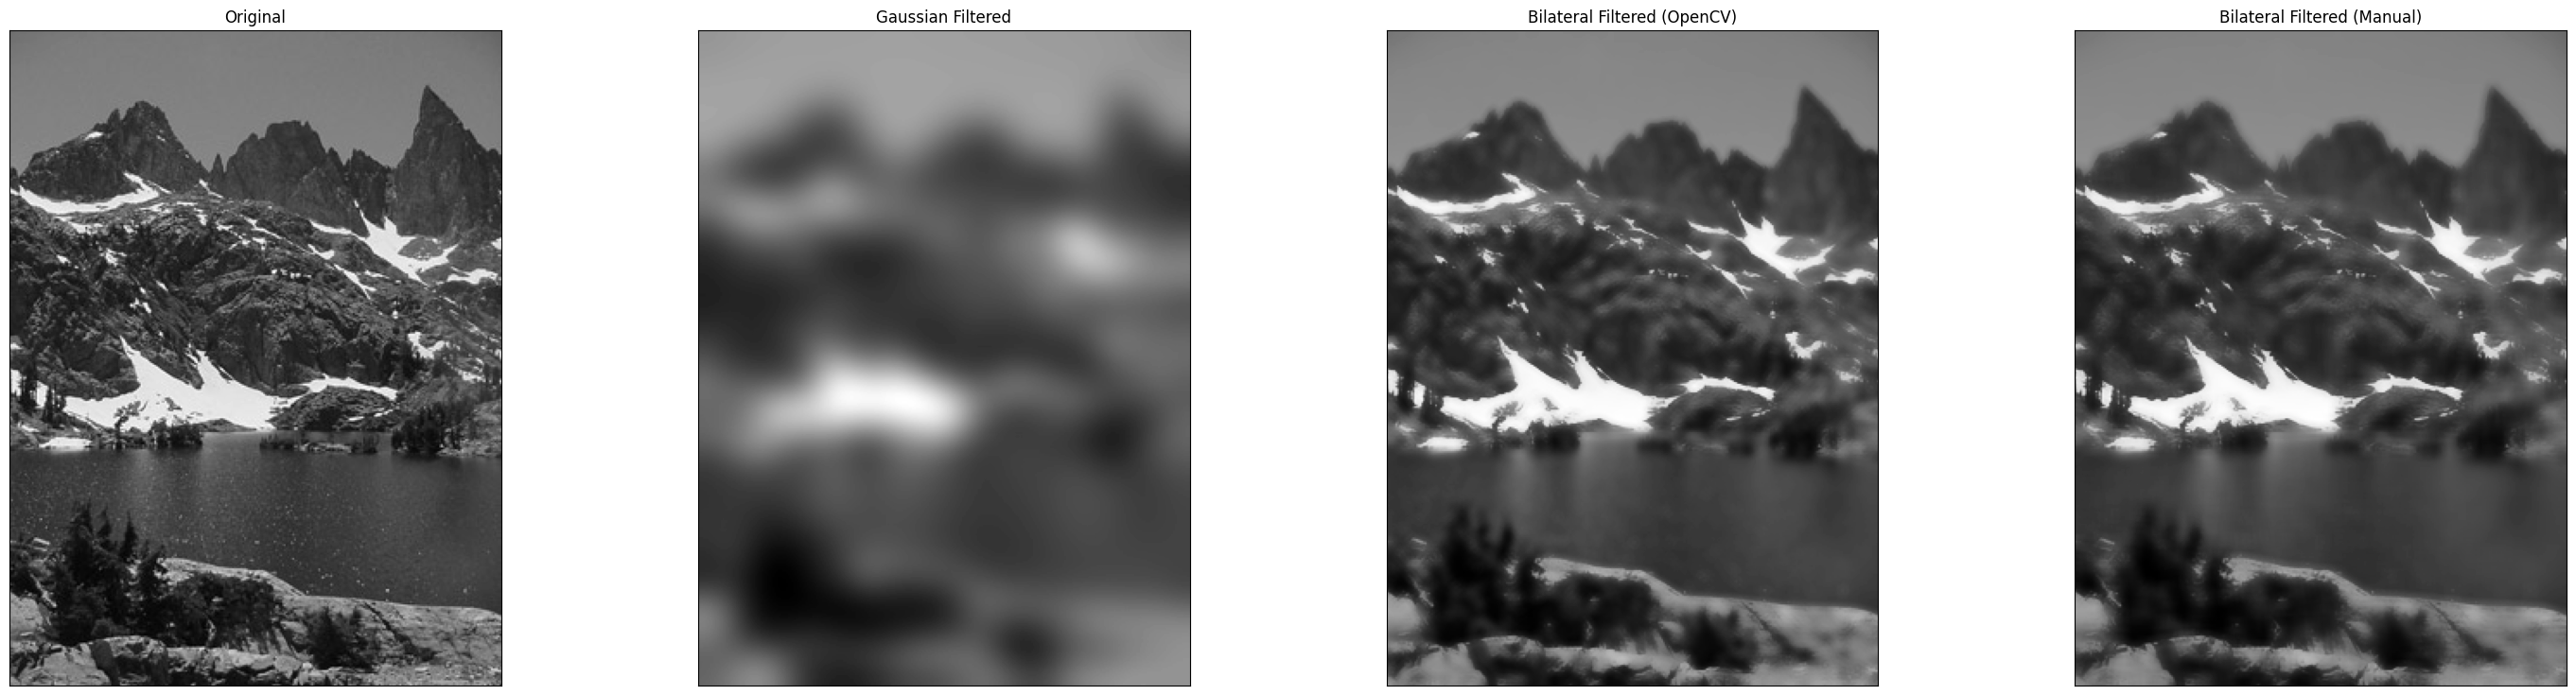

In [ ]:
# Manual Bilateral Filtering using filter2D logic
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def bilateral_filter_manual(im, diameter, sigma_r, sigma_s):
    """Manual bilateral filter implementation for grayscale images."""
    # Convert to float32
    im = im.astype(np.float32)

    half_d = diameter // 2
    filtered = np.zeros_like(im)

    # Create spatial Gaussian kernel
    X, Y = np.meshgrid(np.arange(-half_d, half_d + 1), np.arange(-half_d, half_d + 1))
    spatial_kernel = np.exp(-(X**2 + Y**2) / (2 * sigma_s**2))

    # Pad the image
    padded = cv.copyMakeBorder(im, half_d, half_d, half_d, half_d, cv.BORDER_REFLECT)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            # Extract the local region
            local = padded[i:i + diameter, j:j + diameter]
            center = im[i, j]

            # Compute range kernel
            range_kernel = np.exp(-((local - center) ** 2) / (2 * sigma_r ** 2))

            # Combine kernels
            combined = spatial_kernel * range_kernel
            combined /= combined.sum()

            # Apply filter
            filtered[i, j] = np.sum(combined * local)

    return np.uint8(np.clip(filtered, 0, 255))


# Load grayscale image
im = cv.imread('images/minaret.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

# Parameters
sigma_s = 75
sigma_r = 75
diameter = 9  # should be odd

# Gaussian and bilateral using OpenCV
im_gaussian = cv.GaussianBlur(im, (sigma_s, sigma_s), 0)
im_bilateral_cv = cv.bilateralFilter(im, diameter, sigma_r, sigma_s)

# Manual bilateral
im_bilateral_manual = bilateral_filter_manual(im, diameter, sigma_r, sigma_s)

# Plot
fig, ax = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(36, 9))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_gaussian, cmap='gray')
ax[1].set_title('Gaussian Filtered')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_bilateral_cv, cmap='gray')
ax[2].set_title('Bilateral Filtered (OpenCV)')
ax[2].set_xticks([]), ax[2].set_yticks([])

ax[3].imshow(im_bilateral_manual, cmap='gray')
ax[3].set_title('Bilateral Filtered (Manual)')
ax[3].set_xticks([]), ax[3].set_yticks([])

plt.show()
